<a href="https://colab.research.google.com/github/GuiTxx/dashboard-open-df-salary/blob/main/aula_1_Imersao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1 - Imersão **DADOS** Alura

In [ ]:
# IMPORTANDO AS BIBLIOTECAS NECESSÁRIAS;
import pandas as pd

In [ ]:
# df = data frame
# shift + enter -> roda a célula
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [ ]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [ ]:
# CADA INFO TEM UM TYPE DIFERENTE E É IMPORTANTE SABEMOS SOBRE;
# VALE DIZER QUE CADA TIPO VAI DEMANDAR MAIS DA MEMÓRIA, POR EXEMLO UMA FLOAT;
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [ ]:
# ELE DESCREVE ALGUNS DADOS COM BASE EM ESTATÍSTICA, POR EXEMPLO -> SALARY -> MAX -> 30.400.000
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
# (QUANTIDADE DE LINHAS, DE COLUNAS)
df.shape

(133349, 11)

In [ ]:
linhas, colunas = df.shape
print("Linhas:",linhas)
print("Colunas:",colunas)

Linhas: 133349
Colunas: 11


In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
#renomear as colunas do dataframe para portugues brasileiro
renameColumns = {
    "work_year": "ano",
    "experience_level": "senioridade",
    "employment_type": "contrato",
    "job_title": "cargo",
    "salary": "salario",
    "salary_currency": "moeda",
    "salary_in_usd": "usd",
    "employee_residence": "residencia",
    "remote_ratio": "remoto",
    "company_location": "localizacao",
    "company_size": "tamanho_empresa",
}

df.rename(columns = renameColumns, inplace= True)
df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'localizacao', 'tamanho_empresa'],
      dtype='object')

In [ ]:
# CHECAR QUAL INFO É MODA DA SEÇÃO, POR EXEMPLO NIVEL EXPERIENCIA -> SE (SENIOR)
df["senioridade"].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [ ]:
df['senioridade'] = df['senioridade'].replace({
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
})

df['senioridade'].value_counts()

,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [ ]:
df["contrato"] = df["contrato"].replace({
    'FT': 'Tempo Integral',
    'PT': 'Meio Integral',
    'Contrato por Tempo Determinado': 'Tempo Determinado',
    'FL': 'FreeLance'
})

df["contrato"].value_counts()

,count
contrato,
Tempo Integral,132563
CT,394
Meio Integral,376
FreeLance,16


In [ ]:
# 0 - PRESENCIAL
# 0.5 - HÍBRIDO
# 1 - REMOTO
df["remoto"] = df['remoto'].replace({
    0 : 'Presencial',
    100 : 'Remoto',
    50 : 'Híbrido'
})

df['remoto'].value_counts()

,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [ ]:
df["tamanho_empresa"] = df['tamanho_empresa'].replace({
    'M':'Média',
    'L':'Grande',
    'S':"Pequena"
})
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
Média,129561
Grande,3574
Pequena,214


In [ ]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [ ]:
# FREQ -> É EM RELAÇÃO A QUANTO APARECE DO TOP
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,localizacao,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


# PRIMEIRA PALAVRA CHAVE -> **PANDAS**

#  Aula 2 - Imersão **DADOS** Alura

In [ ]:
# ANALISE SE HÁ ALGUM NÚMERO NULO
df.isnull() # O problema de fazer isso, é que ele não cosegue mostrar todos os dados na tela, logo vamos mudar a análise

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
localizacao,0


In [ ]:
df["ano"].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [ ]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [ ]:
import numpy as np
# Criação de data Frame de teste, para poder aplicar maneiras de preencher, atributos NAN
df_salarios = pd.DataFrame({
    'nome':['Guilherme', 'Marcia', 'Maria', 'Leo', 'Rafa'],
    'salario':[1200, np.nan, 3540, np.nan, 100000]
})

# Pega nosso banco de dados, cria uma nova coluna chamada "salario_media" e faz a media com base na coluna salario
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
# Da mesma forma que acima, porém faz agora a Mediana
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Guilherme,1200.0,1200.00,1200.0
1,Marcia,NaN,34913.33,3540.0
2,Maria,3540.0,3540.00,3540.0
3,Leo,NaN,34913.33,3540.0
4,Rafa,100000.0,100000.00,100000.0


In [ ]:
df_temperatura = pd.DataFrame({
    'dias' : ['segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira', 'sexta-feira','sábado', 'domingo'],
    'temperatura' : [37, 29, np.nan, np.nan, 28, 26, 24]
})

#Método pandas "ffill" (foward fill), ele completa os nulos com o valor anterior

df_temperatura['temperaturas_ajustadas'] = df_temperatura['temperatura'].ffill()

df_temperatura



,dias,temperatura,temperaturas_ajustadas
0,segunda-feira,37.0,37.0
1,terça-feira,29.0,29.0
2,quarta-feira,NaN,29.0
3,quinta-feira,NaN,29.0
4,sexta-feira,28.0,28.0
5,sábado,26.0,26.0
6,domingo,24.0,24.0


In [ ]:
df_temperatura = pd.DataFrame({
    'dias' : ['segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira', 'sexta-feira','sábado', 'domingo'],
    'temperatura' : [37, 29, np.nan, np.nan, 28, 26, 24]
})

#Método pandas "bfill" (backward fill), ele completa os nulos com o valor anterior

df_temperatura['temperaturas_ajustadas'] = df_temperatura['temperatura'].bfill()

df_temperatura

,dias,temperatura,temperaturas_ajustadas
0,segunda-feira,37.0,37.0
1,terça-feira,29.0,29.0
2,quarta-feira,NaN,28.0
3,quinta-feira,NaN,28.0
4,sexta-feira,28.0,28.0
5,sábado,26.0,26.0
6,domingo,24.0,24.0


In [ ]:
df_cidades = pd.DataFrame({
    'nome':['Guilherme', 'Márcia', 'Maria', 'Maurício', 'Leonardo', 'Rafael'],
    'cidade':['Indaiatuba','Indaiatuba', np.nan,'Indaiatuba','Indaiatuba','Porto Alegre']
})

df_cidades['ajuste_cidades'] = df_cidades['cidade'].fillna('Não informado')

df_cidades



,nome,cidade,ajuste_cidades
0,Guilherme,Indaiatuba,Indaiatuba
1,Márcia,Indaiatuba,Indaiatuba
2,Maria,NaN,Não informado
3,Maurício,Indaiatuba,Indaiatuba
4,Leonardo,Indaiatuba,Indaiatuba
5,Rafael,Porto Alegre,Porto Alegre


In [ ]:
#Limpa aqueles dados que são NA

df_limpo = df.dropna()

In [ ]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
localizacao,0


In [ ]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [ ]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   localizacao      133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [ ]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

In [ ]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   localizacao      133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


In [ ]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


# SEGUNDA PALAVRA CHAVE -> PRINT

# Aula 3 - Imersão **DADOS** Alura

<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

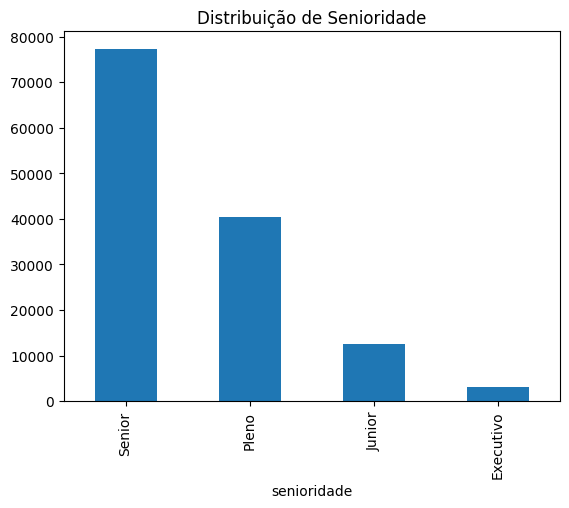

In [ ]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title = 'Distribuição de Senioridade')

<Axes: xlabel='senioridade', ylabel='usd'>

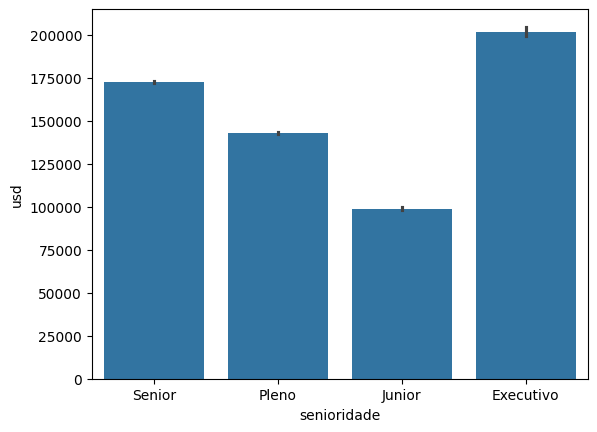

In [ ]:
#Para melhorar os gráficos, vamos utilizar as Bibliotecas MatPlotLib e a Seaborn
#A base de DADOS do desafio veio do Kaggle

import seaborn as sns #por trás dos panos essa biblioteca usa a MathPlot

sns.barplot(data = df_limpo, x = 'senioridade', y='usd')

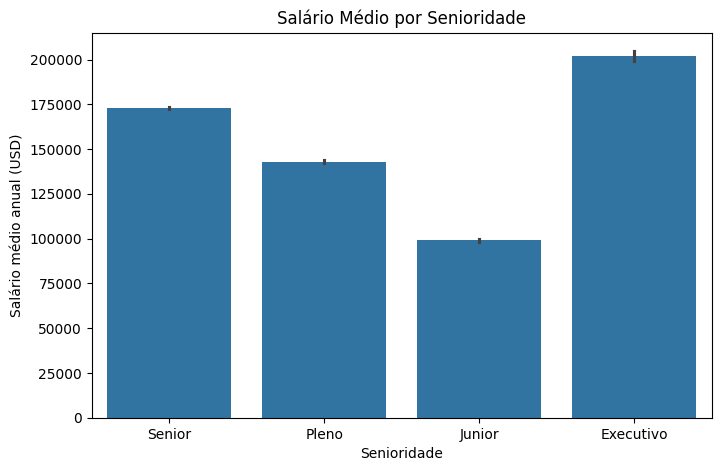

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
sns.barplot(data = df_limpo, x = 'senioridade', y='usd')
plt.title('Salário Médio por Senioridade')
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()

In [ ]:
# VAMOS DEIXAR AS BARRAS EM ORDEM, COM O PANDAS E PLOTAR COM O MATPLOT
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending = False)

,usd
senioridade,
Executivo,202027.667813
Senior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [ ]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending = False).index
#ascending -> crescente / ascending = False -> decrescente
ordem

Index(['Executivo', 'Senior', 'Pleno', 'Junior'], dtype='object', name='senioridade')

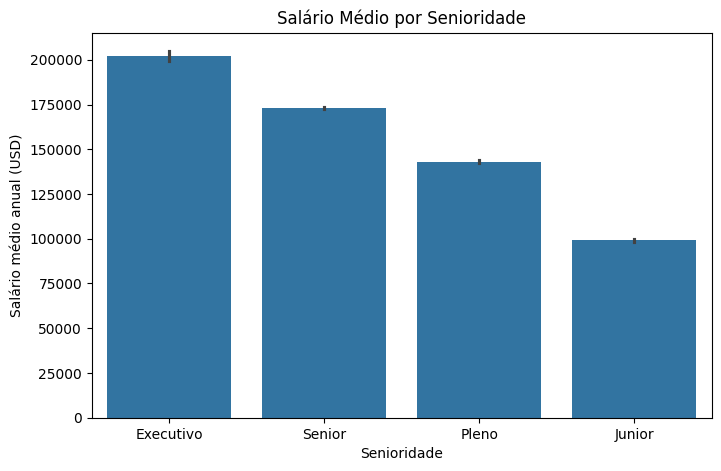

In [ ]:
plt.figure(figsize = (8, 5))
sns.barplot(data = df_limpo, x = 'senioridade', y='usd', order = ordem)
plt.title('Salário Médio por Senioridade')
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()

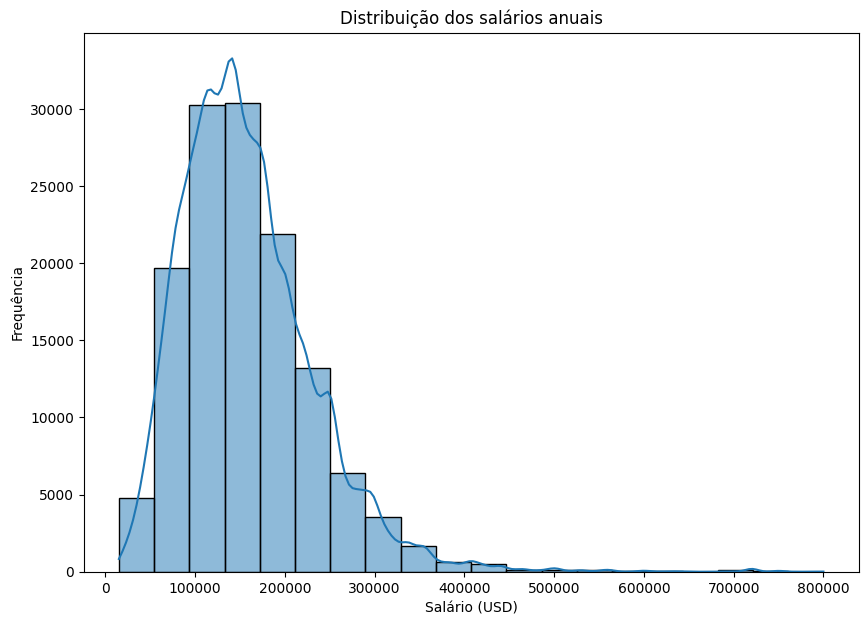

In [ ]:
plt.figure(figsize=(10, 7))
sns.histplot(df_limpo['usd'], kde = True, bins = 20)
plt.title('Distribuição dos salários anuais')
plt.xlabel("Salário (USD)")
plt.ylabel("Frequência")
plt.show()

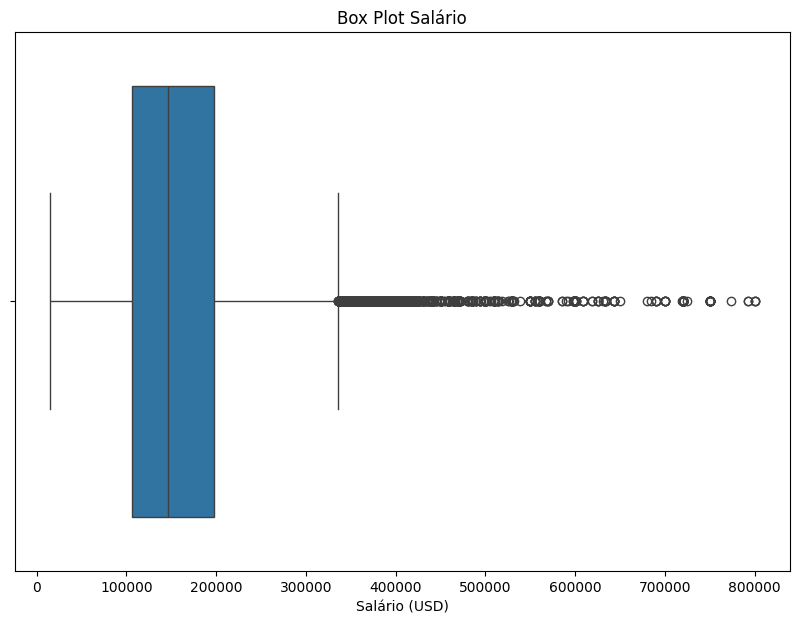

In [ ]:
#O Box Plot ele cria uma caixa (azul), esta caixa tem o valor minimo (lado esquerdo caixa), valor máximo (lado direito caixa), o meio é a mediana dos valores e ai, o interessante é que acima da linha direita temos os markers que contabilizam os valores DISCREPANTES dos nossos dados.

# Os valores discrepantes são chamados de OUTLIERS

plt.figure(figsize=(10, 7))
sns.boxplot(x = df_limpo['usd'])
plt.title('Box Plot Salário')
plt.xlabel("Salário (USD)")
plt.show()

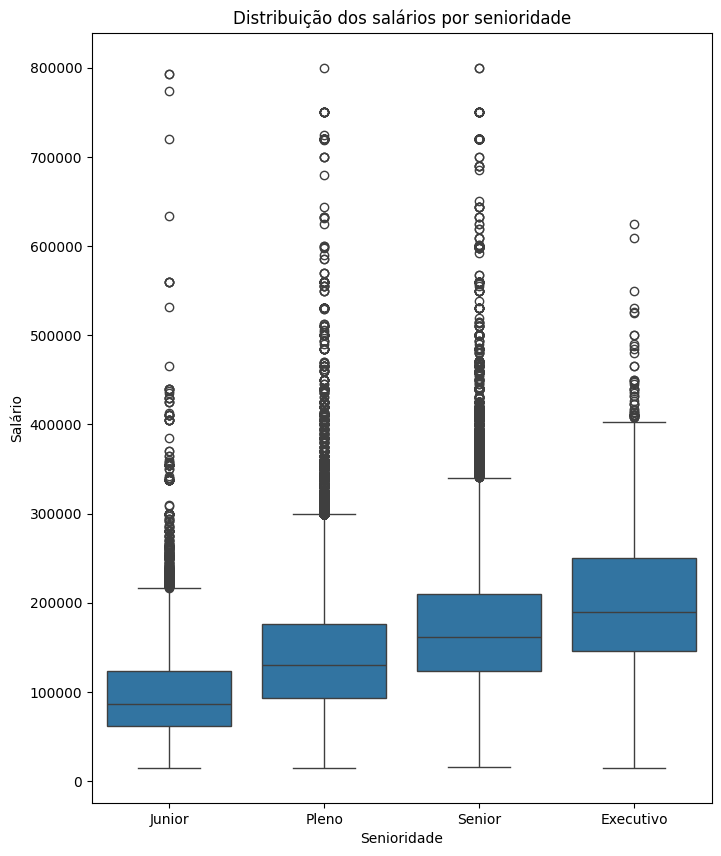

In [ ]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo'] # Corrigido para corresponder aos dados
plt.figure(figsize=(8, 10))
sns.boxplot(x = 'senioridade', y = 'usd', data = df_limpo, order = ordem_senioridade)
plt.title('Distribuição dos salários por senioridade')
plt.xlabel("Senioridade")
plt.ylabel("Salário")
plt.show()

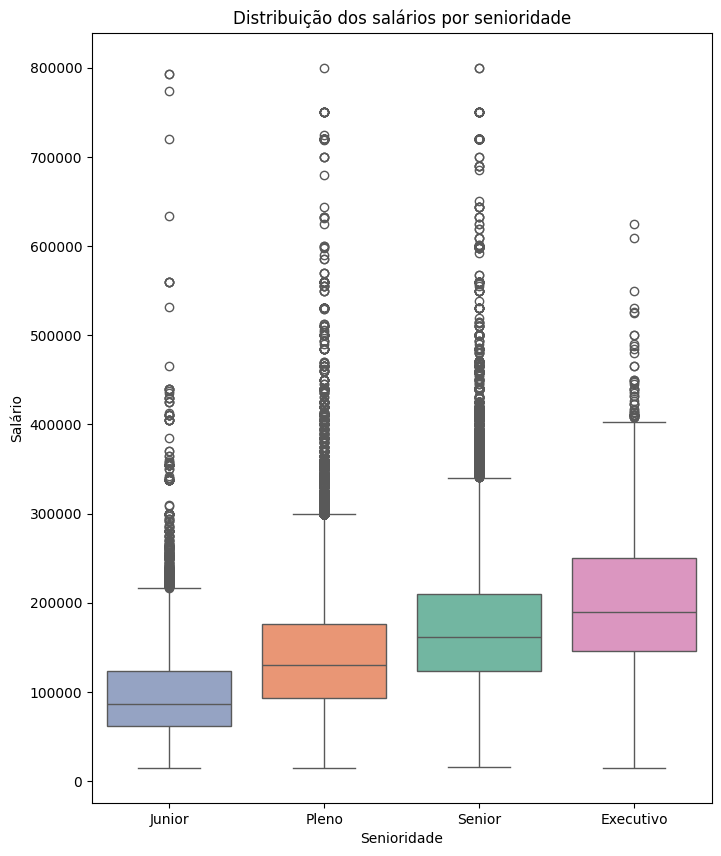

In [ ]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo'] # Corrigido para corresponder aos dados
plt.figure(figsize=(8, 10))
sns.boxplot(x = 'senioridade', y = 'usd', data = df_limpo, order = ordem_senioridade, palette = 'Set2', hue = 'senioridade')
plt.title('Distribuição dos salários por senioridade')
plt.xlabel("Senioridade")
plt.ylabel("Salário")
plt.show()

In [ ]:
# INTERATIVIDADE COM O GRÁFICO
import plotly.express as px

senioridade_med_Salarial = df_limpo.groupby('senioridade')['usd'].mean().sort_values( ascending = False).reset_index()

fig = px.bar(senioridade_med_Salarial,
             x = 'senioridade',
             y = 'usd',
             title = 'Media salarial por senioridade',
             labels= {'senioridade': 'Nível Senioridade', 'usd':'Média Salarial Anual (USD)'}
             )

fig.show()

In [ ]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'contagem']
fig = px.pie(remoto_contagem,
             names = 'tipo_trabalho',
             values = 'contagem',
             title = 'Proporção tipos Trabalho',
             hole = 0.25,
             )
fig.update_traces(textinfo = 'percent+label')
fig.show()

In [ ]:
# Salva o DataFrame df_limpo em um arquivo CSV
df_limpo.to_csv('data_frame_limpo.csv', index=False)

# TERCEIRA PALAVRA CHAVE -> MATPLOTLIB

# Aula 4 - Imersão **DADOS** Alura

In [ ]:
# venv -> view environmente ---> AMBIENTE VIRTUAL
%%writefile app.py
#IMPORTANDO AS BIBLIOTECAS
#!pip install streamlit
import streamlit as st
import pandas as pd
import plotly.express as px

st.set_page_config(
    page_title= 'Dash Salários em Dados',
    page_icon= '🎲',
    layout = 'wide'
)

# Carregando DADOS
df = pd.read_csv('/content/data_frame_limpo.csv')

#BARRA LATERAL -> FILTRO
st.sidebar.header('🔍Filtros')

#FILTRO DO ANO
anos_disponiveis = sorted(df['ano'].unique())
ano_selecionado = st.sidebar.multiselect('Ano', anos_disponiveis, default = anos_disponiveis)

#FILTRO SENIORIDADE
senioridade_disponiveis = sorted(df['senioridade'].unique())
senioridade_selecionada = st.sidebar.multiselect('Ano', senioridade_disponiveis, default = senioridade_disponiveis)

# FILTRO POR TIPO DE CONTRATO
contrato_disponiveis = sorted(df['contrato'].unique())
contrato_selecionado = st.sidebar.multiselect('Ano', contrato_disponiveis, default = contrato_disponiveis)


#FILTRO POR TAMANHO DA EMPRESA
tamanhos_disponiveis = sorted(df['tamanho_empresa'].unique())
tamanho_selecionado = st.sidebar.multiselect('Ano', tamanhos_disponiveis, default = tamanhos_disponiveis)

Writing app.py


In [ ]:
!curl https://loca.lt/mytunnelpassword

34.106.128.229

In [ ]:
!streamlit run app.py &>/content/logs.text &

In [ ]:
!npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙your url is: https://pretty-berries-eat.loca.lt
^C
